In [2]:
# ---------------------------------------------------------------------------------------------------- #
# Author : Ramendra Bharadwaj
# Purpose: Pattern Recognition Assignment - Comparative Study of Models with Visualizations
# Models : Logistic Regression, SVM, KNN, Linear Regression, SVR, PCA
# Dataset: Wine Quality (Red & White)
# ---------------------------------------------------------------------------------------------------- #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    mean_squared_error, r2_score
)

import warnings
warnings.filterwarnings("ignore")



# # Pairplot for selected features
# sns.pairplot(df.sample(500), hue="wine_type", vars=["alcohol", "sulphates", "citric acid", "pH"])
# plt.show()



In [3]:
# ===========================
# Step 1. Load & Combine Data
# ===========================

data_path1 = r"/Users/ramendrabharadwaj/IIT Patna/APR Assignment/APR-Assignment/Source data/winequality-red.csv"
data_path2 = r"/Users/ramendrabharadwaj/IIT Patna/APR Assignment/APR-Assignment/Source data/winequality-white.csv"

red = pd.read_csv(data_path1, sep=";")
white = pd.read_csv(data_path2, sep=";")

# Add wine type
red["wine_type"] = "red"
white["wine_type"] = "white"

df = pd.concat([red, white], ignore_index=True)
print("Dataset shape:", df.shape)
print(df["wine_type"].value_counts())

Dataset shape: (6497, 13)
wine_type
white    4898
red      1599
Name: count, dtype: int64


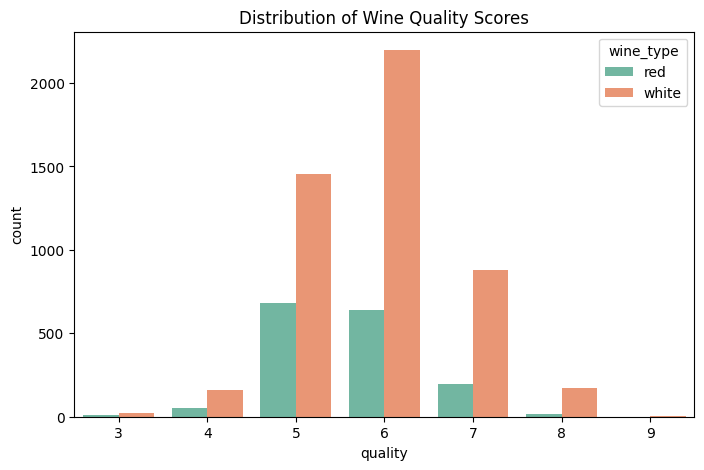

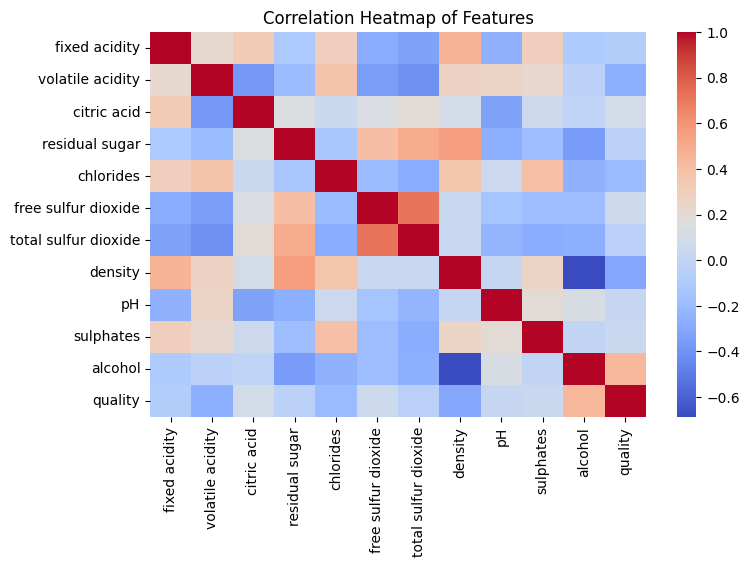

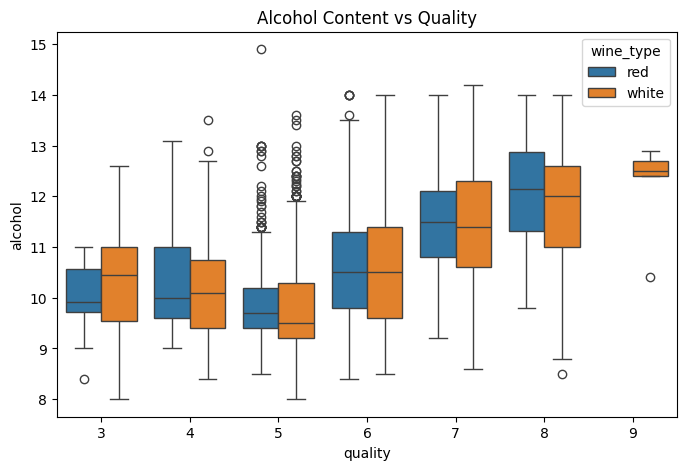

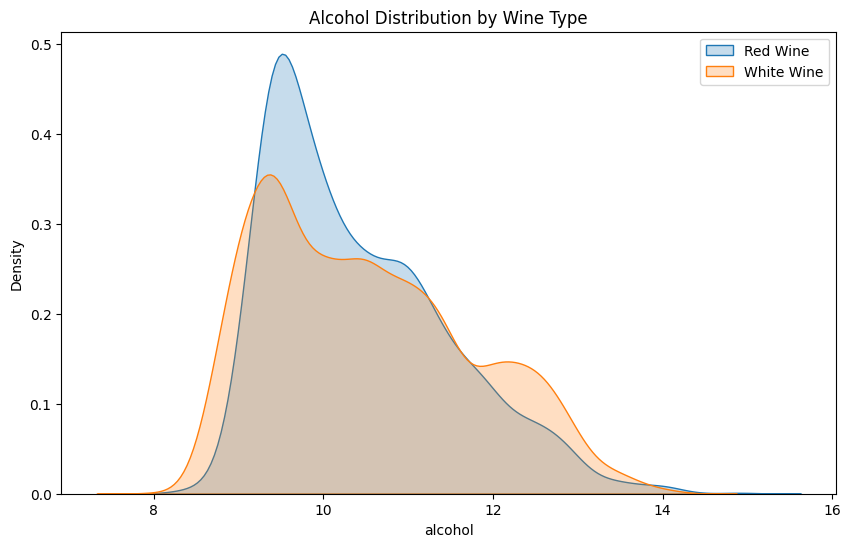

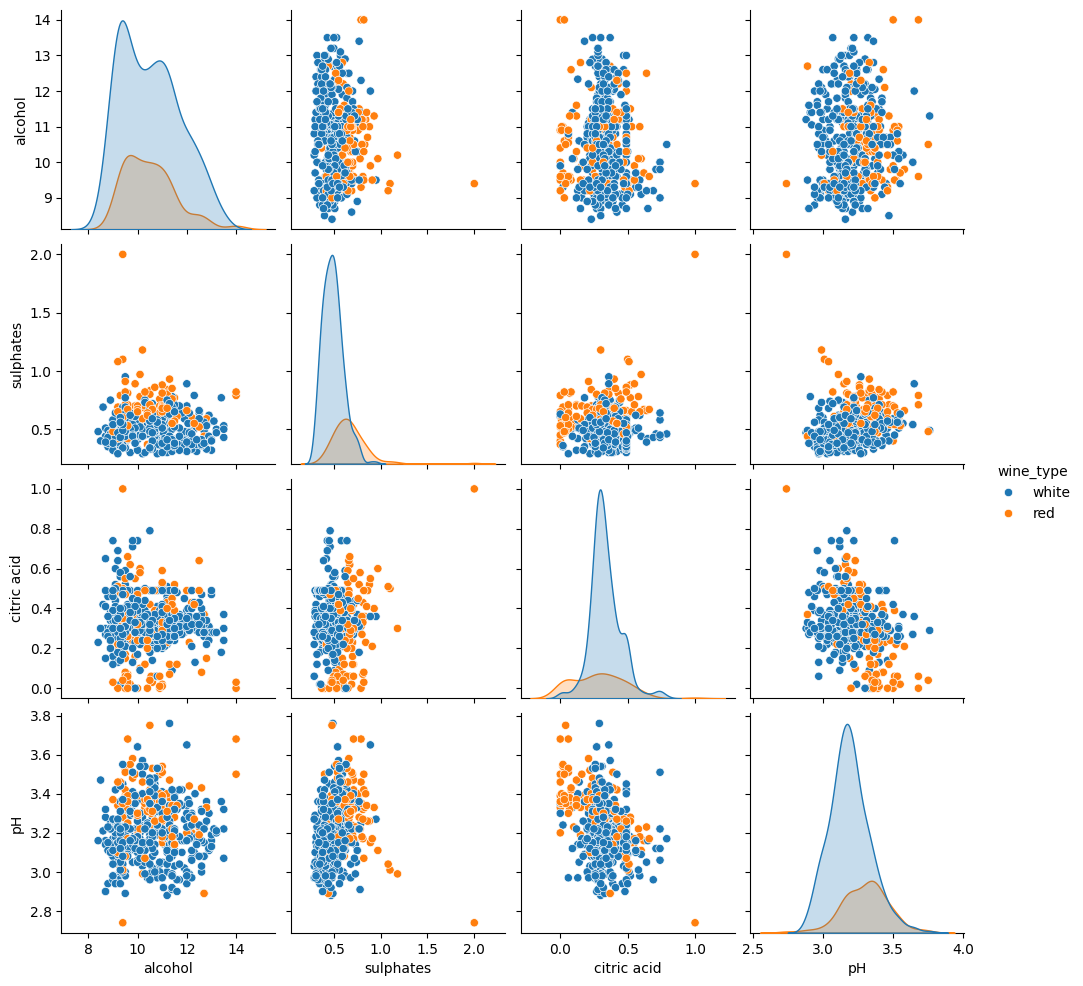

In [4]:
# ===========================
# Step 2. EDA Visualizations
# ===========================

# Distribution of wine quality scores
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df, hue="wine_type", palette="Set2")
plt.title("Distribution of Wine Quality Scores")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

# Boxplot for alcohol vs quality
plt.figure(figsize=(8,5))
sns.boxplot(x="quality", y="alcohol", data=df, hue="wine_type")
plt.title("Alcohol Content vs Quality")
plt.show()

# Density plot for alcohol distribution
plt.figure(figsize=(10,6))
sns.kdeplot(df[df["wine_type"]=="red"]["alcohol"], label="Red Wine", shade=True)
sns.kdeplot(df[df["wine_type"]=="white"]["alcohol"], label="White Wine", shade=True)
plt.title("Alcohol Distribution by Wine Type")
plt.legend()
plt.show()

# Pairplot for selected features
sns.pairplot(df.sample(500), hue="wine_type", vars=["alcohol", "sulphates", "citric acid", "pH"])
plt.show()

Logistic Regression Accuracy: 0.742
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

        high       0.77      0.83      0.80      1234
         low       0.67      0.58      0.62       716

    accuracy                           0.74      1950
   macro avg       0.72      0.71      0.71      1950
weighted avg       0.74      0.74      0.74      1950



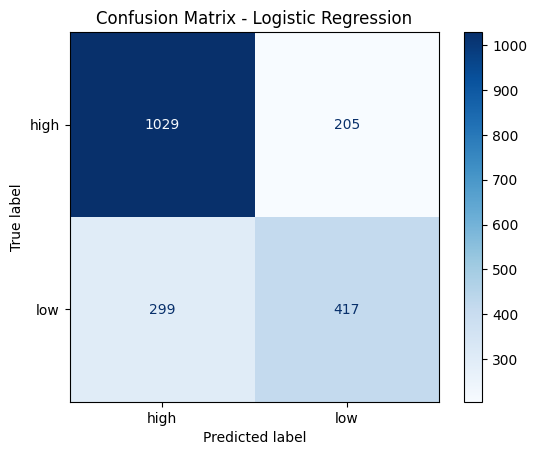

SVC Accuracy: 0.777
Classification Report (SVC):
               precision    recall  f1-score   support

        high       0.80      0.86      0.83      1234
         low       0.72      0.64      0.68       716

    accuracy                           0.78      1950
   macro avg       0.76      0.75      0.75      1950
weighted avg       0.77      0.78      0.77      1950



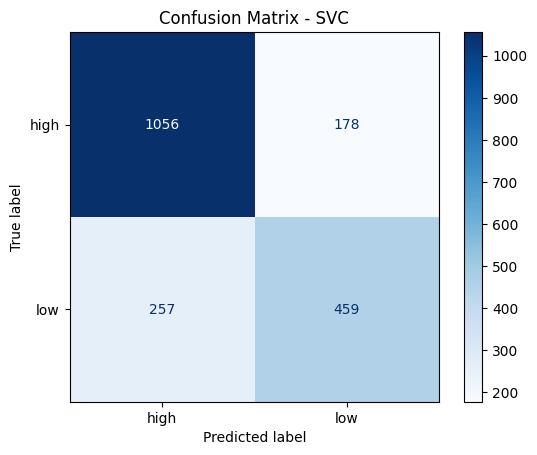

KNN Accuracy: 0.750
Classification Report (KNN):
               precision    recall  f1-score   support

        high       0.79      0.82      0.81      1234
         low       0.67      0.63      0.65       716

    accuracy                           0.75      1950
   macro avg       0.73      0.72      0.73      1950
weighted avg       0.75      0.75      0.75      1950



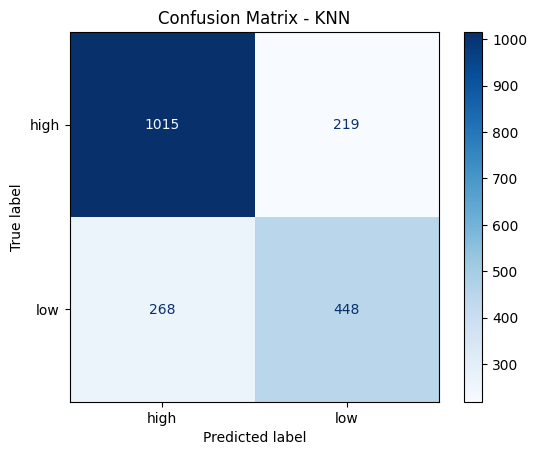

In [5]:
# ===========================
# Step 3. Classification Task
# ===========================

# Binary classification: high (>=6) vs low (<6)
df["label"] = np.where(df["quality"] >= 6, "high", "low")

X = df.drop(["quality", "label", "wine_type"], axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
logreg = LogisticRegression(max_iter=1000)
svc = SVC()
knn = KNeighborsClassifier()

models = {
    "Logistic Regression": logreg,
    "SVC": svc,
    "KNN": knn
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")
    print(f"Classification Report ({name}):\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

Linear Regression -> MSE: 0.533, R²: 0.270


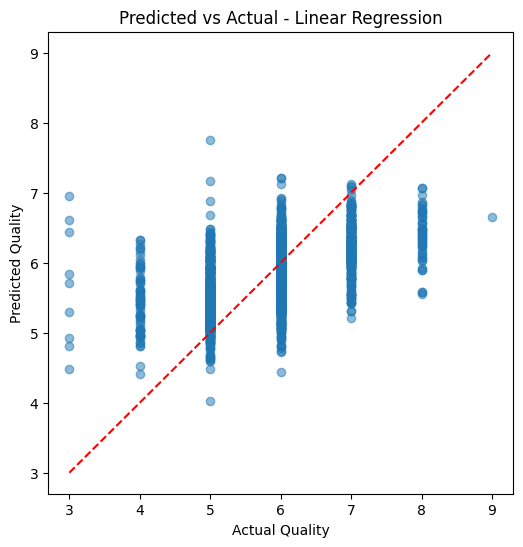

SVR -> MSE: 0.449, R²: 0.384


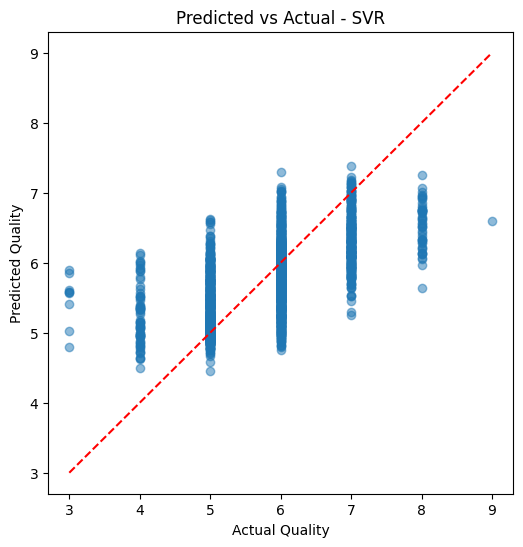

In [6]:
# ===========================
# Step 4. Regression Task
# ===========================

# Predict wine quality (numeric)
Xr = df.drop(["quality", "label", "wine_type"], axis=1)
yr = df["quality"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(Xr, yr, test_size=0.3, random_state=42)

scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

lin_reg = LinearRegression()
svr = SVR()

reg_models = {
    "Linear Regression": lin_reg,
    "SVR": svr
}

for name, model in reg_models.items():
    model.fit(X_train_r, y_train_r)
    y_pred_r = model.predict(X_test_r)

    mse = mean_squared_error(y_test_r, y_pred_r)
    r2 = r2_score(y_test_r, y_pred_r)

    print(f"{name} -> MSE: {mse:.3f}, R²: {r2:.3f}")

    # Scatter plot predicted vs actual
    plt.figure(figsize=(6,6))
    plt.scatter(y_test_r, y_pred_r, alpha=0.5)
    plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
    plt.xlabel("Actual Quality")
    plt.ylabel("Predicted Quality")
    plt.title(f"Predicted vs Actual - {name}")
    plt.show()


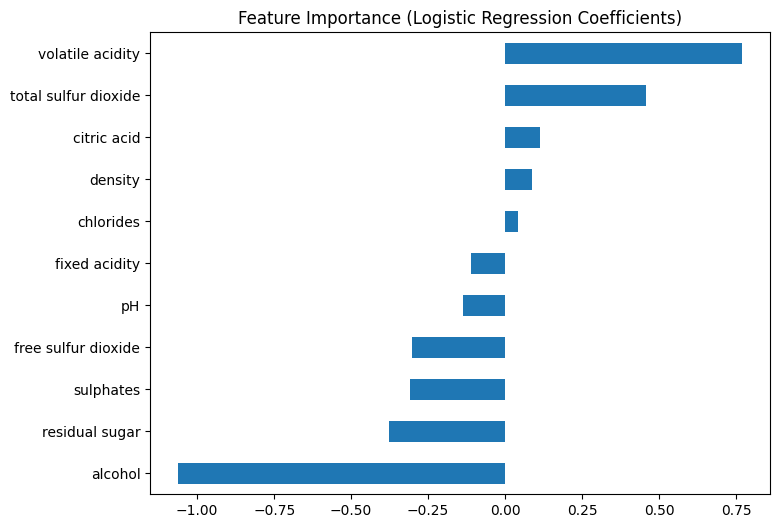

In [7]:
# ===========================
# Step 5. Feature Importance
# ===========================

logreg.fit(X_train, y_train)
importance = pd.Series(logreg.coef_[0], index=df.drop(["quality", "label", "wine_type"], axis=1).columns)

plt.figure(figsize=(8,6))
importance.sort_values().plot(kind="barh")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()